# Taller callbacks y ajuste de hiperparametros.

La idea de este taller es que repase conceptos de las redes neuronales como: callbacks(1) y keras tuners(2).

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 25.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import kerastuner as kt

Using TensorFlow backend


<ipython-input-36-3d50f1517d09>:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


# 0. Cargue el conjunto de datos MNIST usando keras

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


# 1. Entre una red neuronal para el conjunto de datos

Usando los labels entre una red neuronal que clasifique entre los diferentes dígitos, grafique las curvas de entrenamiento (consulte: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plt.figure(figsize=(12, 5))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2986 - accuracy: 0.9130 - val_loss: 0.1453 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1445 - accuracy: 0.9577 - val_loss: 0.1074 - val_accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1089 - accuracy: 0.9672 - val_loss: 0.0868 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0888 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9762 - val_loss: 0.0786 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9793 - val_loss: 0.0757 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9813 - val_loss: 0.0736 - val_accuracy:

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Curva de Perdida')

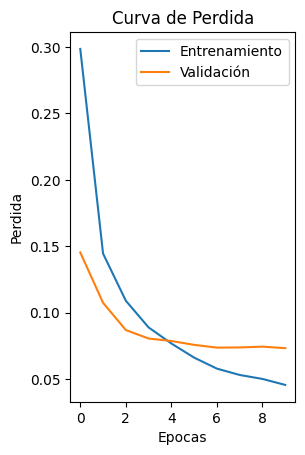

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.title('Curva de Perdida')

Text(0.5, 1.0, 'Curva de Precision')

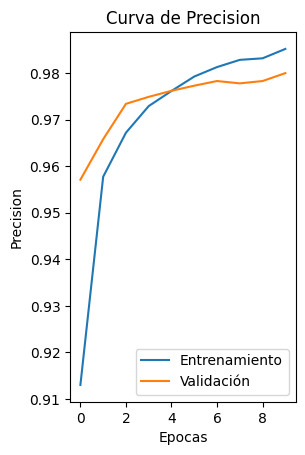

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Epocas')
plt.ylabel('Precision')
plt.legend()
plt.title('Curva de Precision')

# 1.1 uso de regularzadores

Utilice el regularizador L2 (consulte: https://keras.io/api/layers/regularizers/) para entrenar su modelo, grafique de nuevo las curvas de entrenamiento.

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4382 - accuracy: 0.9183 - val_loss: 0.3834 - val_accuracy: 0.9315
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4050 - accuracy: 0.9278 - val_loss: 0.3504 - val_accuracy: 0.9433
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3877 - accuracy: 0.9314 - val_loss: 0.3388 - val_accuracy: 0.9459
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3778 - accuracy: 0.9327 - val_loss: 0.3268 - val_accuracy: 0.9523
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3708 - accuracy: 0.9345 - val_loss: 0.3067 - val_accuracy: 0.9544
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3640 - accuracy: 0.9363 - val_loss: 0.3108 - val_accuracy: 0.9532
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3610 - accuracy: 0.9386 - val_loss: 0.3112 - val_accuracy:

In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Curva de Pérdida con Regularización L2')

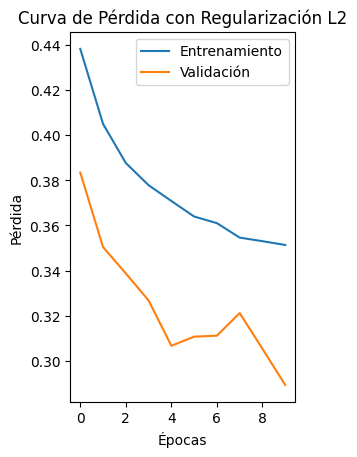

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validacion')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.title('Curva de Perdida con Regularizacion L2')

Text(0.5, 1.0, 'Curva de Precisión con Regularización L2')

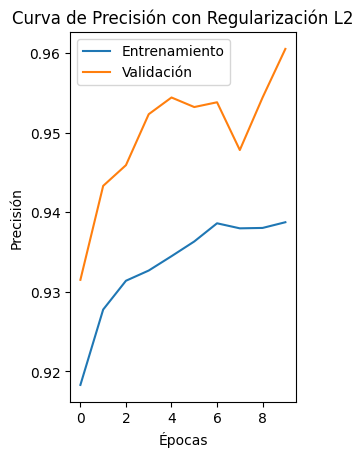

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validacion')
plt.xlabel('Epocas')
plt.ylabel('Precision')
plt.legend()
plt.title('Curva de Precision con Regularizacion L2')

# 1.2 Early stopping

Utilice el early stopping (consulte: https://pub.towardsai.net/keras-earlystopping-callback-to-train-the-neural-networks-perfectly-2a3f865148f7/) para entrenar su modelo, grafique de nuevo las curvas de entrenamiento.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, restore_best_weights=True)

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3379 - accuracy: 0.9419 - val_loss: 0.2765 - val_accuracy: 0.9576
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3356 - accuracy: 0.9410 - val_loss: 0.2730 - val_accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3410 - accuracy: 0.9403 - val_loss: 0.3060 - val_accuracy: 0.9538
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3350 - accuracy: 0.9422 - val_loss: 0.2971 - val_accuracy: 0.9524
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.9403 - val_loss: 0.2931 - val_accuracy: 0.9553
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3408 - accuracy: 0.9407 - val_loss: 0.2827 - val_accuracy: 0.9555
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3403 - accuracy: 0.9405 - val_loss: 0.2759 - val_accuracy:

In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Curva de Pérdida con Early Stopping y Regularización L2')

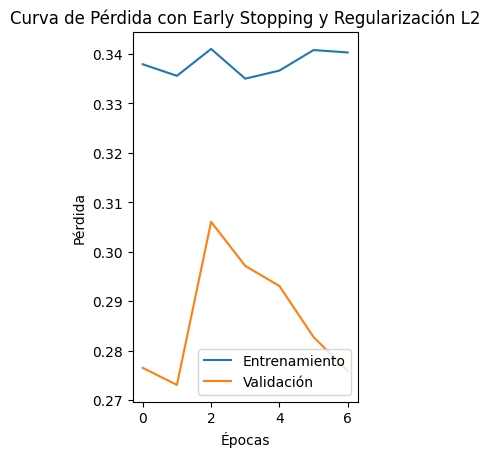

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de Pérdida con Early Stopping y Regularización L2')

Text(0.5, 1.0, 'Curva de Precisión con Early Stopping y Regularización L2')

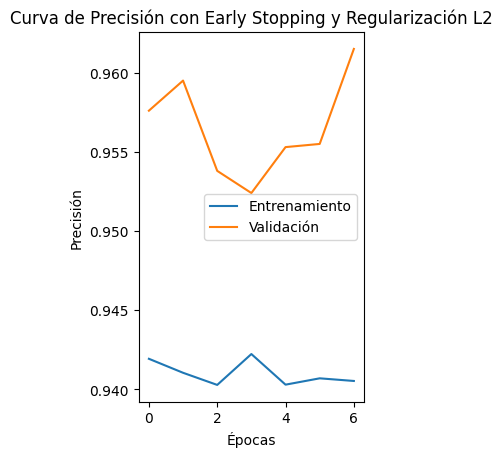

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de Precisión con Early Stopping y Regularización L2')

# 2. Ajuste de hiperparametros

Empleando el método random search (consulte: https://keras.io/guides/keras_tuner/getting_started/), identifique los valores ideales de l2 y lr.

In [ ]:
def build_model(hp):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l2(hp.Float("l2", 1e-5, 1e-1, sampling="log"))),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    learning_rate = hp.Float("lr", 1e-4, 1e-2, sampling="log")

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='random_search',
    project_name='hyperparameter_tuning'
)


In [ ]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Trial 10 Complete [00h 01m 23s]
val_accuracy: 0.9214000105857849

Best val_accuracy So Far: 0.9787999987602234
Total elapsed time: 00h 13m 23s


In [ ]:
tuner.results_summary()

Results summary
Results in random_search/hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
l2: 0.00018044476999288145
lr: 0.0006194688410705385
Score: 0.9787999987602234

Trial 07 summary
Hyperparameters:
l2: 4.22903825105699e-05
lr: 0.0004692205847645522
Score: 0.9783999919891357

Trial 04 summary
Hyperparameters:
l2: 0.001322533514373538
lr: 0.0001456646935005104
Score: 0.9646999835968018

Trial 01 summary
Hyperparameters:
l2: 0.03261569156525482
lr: 0.0003306505106446718
Score: 0.9453999996185303

Trial 02 summary
Hyperparameters:
l2: 0.019694598392422654
lr: 0.0023152359118208295
Score: 0.9330000281333923

Trial 06 summary
Hyperparameters:
l2: 0.00124110595981176
lr: 0.008713761456731816
Score: 0.9271000027656555

Trial 05 summary
Hyperparameters:
l2: 0.011971071678914183
lr: 0.003921485837948707
Score: 0.9261000156402588

Trial 09 summary
Hyperparameters:
l2: 0.004342152098607671
lr: 0.007181490911492214